# Desafío - Random Forest
- Para realizar este desafío debes haber estudiado previamente todo el material disponibilizado correspondiente a la unidad.
- Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los requerimientos solicitados y sube el .zip en el LMS.
- Desarrollo desafío:
    - El desafío se debe desarrollar de manera Individual.
    - Para la realización del desafío necesitarás apoyarte del archivo Apoyo Desafío - Random Forest.

## Requerimientos
- Para esta sesión trabajaremos con una base de datos sobre los precios de inmuebles en la ciudad de Ames, Iowa. La base se compone de 2930 registros y contiene un gran número de atributos.
- Nuestro objetivo es generar un modelo que prediga de forma adecuada los precios de inmuebles, medidos con la variable Sale_Price.
- A diferencia de otras sesiones donde implementamos el preprocesamiento a mano, **ahora haremos uso de los archivos serializados en la sesión pasada**.

### Ejercicio 1: Preparación del ambiente de trabajo
- Importe las librerías clásicas a utilizar.
- Para este ejercicio Random Forest de Regresión.
- De manera adicional importe las funciones y clases necesarias para generar un desempeño de métricas en problemas de regresión.
- Elimine la columna `Unnamed: 0` cuando cargue los datos.

In [1]:
# Utiliza esta celda para importar los módulos y cargar el dataframe original

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pickle

warnings.filterwarnings('ignore')

df = pd.read_csv('ames_housing.csv').drop('Unnamed: 0', axis=1)
df

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,None,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,None,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.638933,42.060899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,Split_or_Multilevel,Residential_Low_Density,37,7937,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,CulDSac,...,Good_Privacy,None,0,3,2006,WD,Normal,142500,-93.604776,41.988964
2926,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,0,8885,Pave,No_Alley_Access,Slightly_Irregular,Low,AllPub,Inside,...,Minimum_Privacy,None,0,6,2006,WD,Normal,131000,-93.602680,41.988314
2927,Split_Foyer,Residential_Low_Density,62,10441,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,Shed,700,7,2006,WD,Normal,132000,-93.606847,41.986510
2928,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,77,10010,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Fence,None,0,4,2006,WD,Normal,170000,-93.600190,41.990921


### Ejercicio 2: Importación de archivos serializados
- Importe su modelo entrenado y sus conjuntos de entrenamiento y validación serializados la sesión pasada y evalúe el desempeño del modelo de su compañero con el suyo ¿Cuál es mejor? Si no puede ejecutar el modelo, comente cuáles pueden ser los causantes.
- No es necesario que realice diagnósticos gráficos sobre el modelo, sólo reporte sus métricas.
- Para importar un archivo serializado, puede ocupar la siguiente línea de código:
```python
import pickle
read_model = pickle.load(open("ignacio-soto-act07.sav","rb"))
```

In [2]:
# Utiliza esta celda para cargar tus datos serializados (archivos csv generados de las muestras en el desafío anterior)

X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

In [3]:
# Utiliza esta celda para cargar el modelo serializado de un compañero

model_alvaro = pickle.load(open("alvaro-villanueva-actividad07.sav","rb"))
model_mio = pickle.load(open("rodrigo-barraza-actividad07.sav","rb"))

In [4]:
# Utiliza esta celda para realizar predicciones en tus datos con el modelo de tu compañero

y_hat_alvaro = model_alvaro.predict(X_test.to_numpy())
y_hat_mio = model_mio.predict(X_test)

In [5]:
# Utiliza esta celda para explorar las métricas de las predicciones

print(f'El R2 es de: {r2_score(y_test,y_hat_alvaro)}')
print(f'EL RMSE es de: {np.sqrt(mean_squared_error(y_test,y_hat_alvaro))}')
print(f'EL MAE es de: {mean_absolute_error(y_test,y_hat_alvaro)}')

El R2 es de: 0.43869325094540945
EL RMSE es de: 62814.53123390224
EL MAE es de: 49101.89512055382


In [6]:
print(f'''Métrica R2: 
- Alvaro:  {r2_score(y_test,y_hat_alvaro):.2f}
- Mio:     {r2_score(y_test,y_hat_mio):.2f}
Métrica RMSE:
- Alvaro:  {np.sqrt(mean_squared_error(y_test,y_hat_alvaro)):.2f}
- Mio:     {np.sqrt(mean_squared_error(y_test,y_hat_mio)):.2f}
Métrica MAE:
- Alvaro:  {mean_absolute_error(y_test,y_hat_alvaro):.2f}
- Mio:     {mean_absolute_error(y_test,y_hat_mio):.2f}''')

Métrica R2: 
- Alvaro:  0.44
- Mio:     0.79
Métrica RMSE:
- Alvaro:  62814.53
- Mio:     38793.05
Métrica MAE:
- Alvaro:  49101.90
- Mio:     23893.51


**Comentarios: Vemos que si comparamos el `R2`, `RMSE` y `MAE` de mi compañero con mis métricas, estas son bastante más malas, esto debido a qué nuestro modelo generado ocupo distintas variables para el modelamiento producto de la semilla ocupada**

*Nota: se tuvo que convertir el X_test a numpy ya que las columnas con las que se entrenó eran distintas* 

### Ejercicio 3: Evaluación Random Forest
- En base a los conjuntos de entrenamiento serializados, genere un modelo utilizando `sklearn.ensemble.RandomForest` sin modificar hiper parámetros, sólo declarando la semilla pseudoaleatoria.
- Reporte su desempeño y compárelo con su modelo de la sesión pasada, así como con el de su compañero.

In [7]:
# Utiliza esta celda para entrenar el Random Forest y generar predicciones (usa las muestras divididas cargadas)

model_forest = RandomForestRegressor(random_state=42).fit(X_train, y_train)

y_hat_forest = model_forest.predict(X_test)

In [14]:
# Utiliza esta celda para reportar las métricas

print(f'''Métrica R2: 
- Alvaro:  {r2_score(y_test,y_hat_alvaro):.2f}
- Arbol:   {r2_score(y_test,y_hat_mio):.2f}
- Forest:  {r2_score(y_test,y_hat_forest):.2f}
Métrica RMSE:
- Alvaro:  {np.sqrt(mean_squared_error(y_test,y_hat_alvaro)):.2f}
- Arbol:   {np.sqrt(mean_squared_error(y_test,y_hat_mio)):.2f}
- Forest:  {np.sqrt(mean_squared_error(y_test,y_hat_forest)):.2f}
Métrica MAE:
- Alvaro:  {mean_absolute_error(y_test,y_hat_alvaro):.2f}
- Arbol:   {mean_absolute_error(y_test,y_hat_mio):.2f}
- Forest:  {mean_absolute_error(y_test,y_hat_forest):.2f}''')

Métrica R2: 
- Alvaro:  0.44
- Arbol:   0.79
- Forest:  0.85
Métrica RMSE:
- Alvaro:  62814.53
- Arbol:   38793.05
- Forest:  32295.92
Métrica MAE:
- Alvaro:  49101.90
- Arbol:   23893.51
- Forest:  20028.67


**Comentarios: claramente, al ajustar el modelo random forest estas nos arrojan métrica mejores para todas, ejemplificando así el poder predictivo que tienen los modelos de ensambles como el random forest**

### Ejercicio 4: Reporte las métricas de desempeño
- Para afinar el comportamiento de nuestro modelo, evalúe su desempeño los siguientes hiper parámetros:
    - `max_features`: `None`, `log2`, `sqrt`.
    - `n_estimators`: Evaluar entre 20 y 1000 en pasos de 50.
- Guarde la tasa de error en la exactitud medida con OOB.
- Grafique el comportamiento.

**Tip**: Revisar código utilizado en la sesión

In [9]:
# Utiliza esta celda para generar los arreglos vacíos

n_estimators = range(20, 1000, 50)
max_features = [None, 'log2', 'sqrt']

aux_estimator = []
aux_oob_error = []
aux_feature = []    

In [10]:
# Utiliza esta celda para generar el loop de entrenamiento con oob score

for feature in max_features:
    for estimator in n_estimators:
        forest = RandomForestRegressor(random_state=42, max_features=feature, n_estimators=estimator, oob_score=True).fit(X_train, y_train)
        aux_estimator.append(estimator)
        aux_oob_error.append(forest.oob_score_)
        aux_feature.append(str(feature))

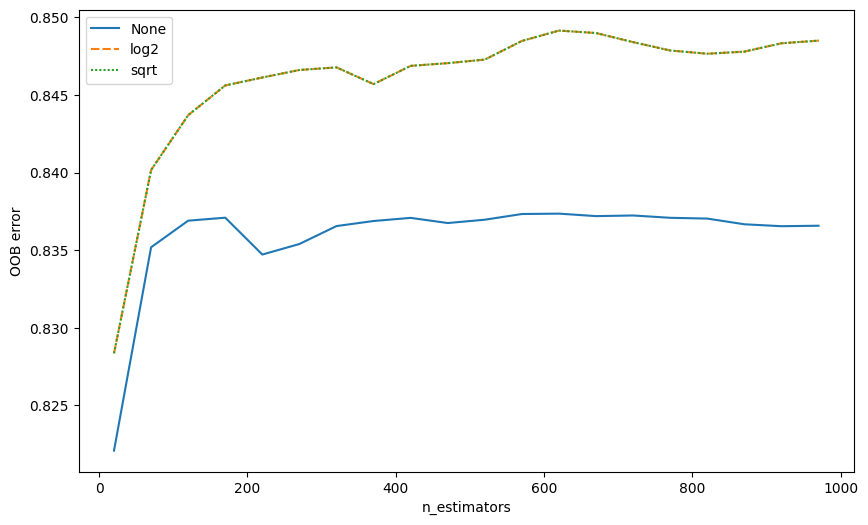

In [11]:
# Utiliza esta celda para graficar los resultados

plt.figure(figsize=(10,6))

sns.lineplot(x=aux_estimator, y=aux_oob_error, hue=aux_feature, style=aux_feature)
plt.xlabel("n_estimators")
plt.ylabel("OOB error")
plt.legend(fontsize=10);

**Comentarios: básicamente, vemos que el valor `None` del hiperparámetro `max_features` tiene mejor desempeño que los valores `log2` y `sqrt`. Además, tanto `log2` y `sqrt` poseen los mismos oob_score. Por lo tanto, podemos decir que los mejores hiperparametros que minimizan los obb_score son:**

- max_features: `log2` o `sqrt`, ya tienen el mismo resultado. En nuestro caso, se ocupara log2
- n_estimators: `620`

### Ejercicio 5: Refactoriza el modelo
- En base a la mejor combinación de hiper parámetros, reentrene el modelo y comente su desempeño.

In [12]:
# Utiliza esta celda para entrenar el nuevo modelo y generar predicciones

forest_opt= RandomForestRegressor(random_state=42, max_features='log2', n_estimators=620).fit(X_train, y_train)

y_hat_forest_opt = forest_opt.predict(X_test)

In [13]:
# Utiliza esta celda para mostrar las métricas

print(f'''Métrica R2: 
- Alvaro:      {r2_score(y_test,y_hat_alvaro):.2f}
- Arbol:       {r2_score(y_test,y_hat_mio):.2f}
- Forest:      {r2_score(y_test,y_hat_forest):.2f}
- Forest opt:  {r2_score(y_test,y_hat_forest_opt):.2f}
Métrica RMSE:
- Alvaro:       {np.sqrt(mean_squared_error(y_test,y_hat_alvaro)):.2f}
- Arbol:        {np.sqrt(mean_squared_error(y_test,y_hat_mio)):.2f}
- Forest:       {np.sqrt(mean_squared_error(y_test,y_hat_forest)):.2f}
- Forest opt:   {np.sqrt(mean_squared_error(y_test,y_hat_forest_opt)):.2f}
Métrica MAE:
- Alvaro:       {mean_absolute_error(y_test,y_hat_alvaro):.2f}
- Arbol:        {mean_absolute_error(y_test,y_hat_mio):.2f}
- Forest:       {mean_absolute_error(y_test,y_hat_forest):.2f}
- Forest opt:   {mean_absolute_error(y_test,y_hat_forest_opt):.2f}''')

Métrica R2: 
- Alvaro:      0.44
- Arbol:       0.79
- Forest:      0.85
- Forest opt:  0.86
Métrica RMSE:
- Alvaro:       62814.53
- Arbol:        38793.05
- Forest:       32295.92
- Forest opt:   31371.54
Métrica MAE:
- Alvaro:       49101.90
- Arbol:        23893.51
- Forest:       20028.67
- Forest opt:   19534.68


**Comentarios: en terminos de métricas, el modelo Random Forest con hiperparámetros resultó levemente mejor que el modelo Ranfom Forest sin los hiperparámetros ajustados, dando cuenta que efectivamente al ocupar los hiperparámetros adeacuados es posible mejorar las métricas del set de datos de testeo.**